In [1]:
import cv2
import numpy
net = cv2.dnn.readNetFromDarknet(r"C:\Users\user\Downloads\yolov3-tiny.cfg",r"C:\Users\user\Downloads\yolov3-tiny.weights")

In [2]:
layer_names = net.getLayerNames()

['conv_0', 'bn_0', 'leaky_1', 'pool_1', 'conv_2', 'bn_2', 'leaky_3', 'pool_3', 'conv_4', 'bn_4', 'leaky_5', 'pool_5', 'conv_6', 'bn_6', 'leaky_7', 'pool_7', 'conv_8', 'bn_8', 'leaky_9', 'pool_9', 'conv_10', 'bn_10', 'leaky_11', 'pool_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'conv_15', 'permute_16', 'yolo_16', 'identity_17', 'conv_18', 'bn_18', 'leaky_19', 'upsample_19', 'concat_20', 'conv_21', 'bn_21', 'leaky_22', 'conv_22', 'permute_23', 'yolo_23']


In [3]:
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

['yolo_16', 'yolo_23']

Yolo 辨識圖片類型
320x320 (high speed, less accuracy)
416x416 (medium speed, medium accuracy)
608x608 (less speed, high accuracy)

In [4]:
img = cv2.imread(r'C:\Users\user\Downloads\dog (1).jpg')


(576, 768, 3)

In [5]:
# img = cv2.resize(img,None,fx=0.4,fy = 0.4)
height,width,chennel = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255.0,(416,416),(0,0,0),True,crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [6]:
import numpy as np
class_ids = []
confidences=[]
boxes = []
for out in outs:
    for detect in out:

        tx,ty,tw,th,confidence = detect[:5]
        score = detect[5:]
        classid = np.argmax(score)

        if confidence>0.3:
            centerx = int(tx*width)
            centery = int(ty*height)
            w = int(tw*width)
            h = int(th*height)
            x = int(centerx-w/2)
            y = int(centery-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(classid)

In [7]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences,0.3,0.4)

In [8]:
coco_list = []
with open(r"C:\Users\user\Downloads\coco.names","r") as f:
    for i in f.read().split("\n"):
        coco_list.append(i)

In [9]:
test = img.copy()
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(coco_list[class_ids[i]])
        cv2.rectangle(test,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(test,label,(x,y-5),cv2.FONT_HERSHEY_PLAIN,3,(0,255,0),2)


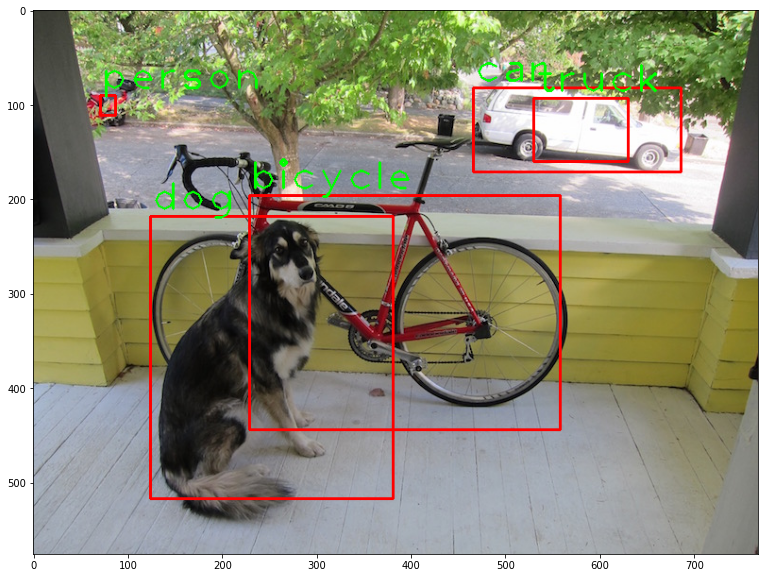

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,10]
test = cv2.resize(test,(width,height))
test_rgb = cv2.cvtColor(test,cv2.COLOR_BGR2RGB)
plt.imshow(test_rgb)